Dans cette partie nous chargeons les données ensuite nous calculons les statistiques de bases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot
dbf = pd.read_csv("multiTimeline.csv",skiprows=2)

#Transformation de la colonne semaine en datetime
dbf['Semaine'] = np.array(dbf['Semaine'], dtype=np.datetime64)

#indexation de la colonne semaine pour la methode resample
dbf.set_index('Semaine',inplace=True)

dbf.head()
training=dbf[0:200]
test=dbf[200:]

#Moyenne generale
print("Moyenne:{}".format(dbf.mean()))

print("===================================================================")
#Calcul de la moyenne par semaine
print("Moyenne par semaine:{}".format(dbf.resample('W').mean()))
print("===================================================================")
#Calcul de l'ecart type
print("Ecart-Type:{}".format(dbf.std()))
print("===================================================================")
#Calcul de la variance
print("Variance:{}".format(dbf.var()))
print("===================================================================")
#Calcul de la Covariance
print("Covariance:{}".format(dbf.cov()))
print("===================================================================")
#Calcul du Min et du Max
print("Min:{}\t Max:{}".format(dbf.min(),dbf.max()))

Moyenne:paludisme: (Burkina Faso)    39.761538
dtype: float64
Moyenne par semaine:            paludisme: (Burkina Faso)
Semaine                              
2015-08-30                         39
2015-09-06                         38
2015-09-13                         55
2015-09-20                         43
2015-09-27                         34
...                               ...
2020-07-19                         45
2020-07-26                         20
2020-08-02                         16
2020-08-09                         53
2020-08-16                         41

[260 rows x 1 columns]
Ecart-Type:paludisme: (Burkina Faso)    16.670925
dtype: float64
Variance:paludisme: (Burkina Faso)    277.919751
dtype: float64
Covariance:                           paludisme: (Burkina Faso)
paludisme: (Burkina Faso)                 277.919751
Min:paludisme: (Burkina Faso)    0
dtype: int64	 Max:paludisme: (Burkina Faso)    100
dtype: int64


Dans cette section nous allons illustrer les données dans un graphe.

Text(0.5, 0, 'year')

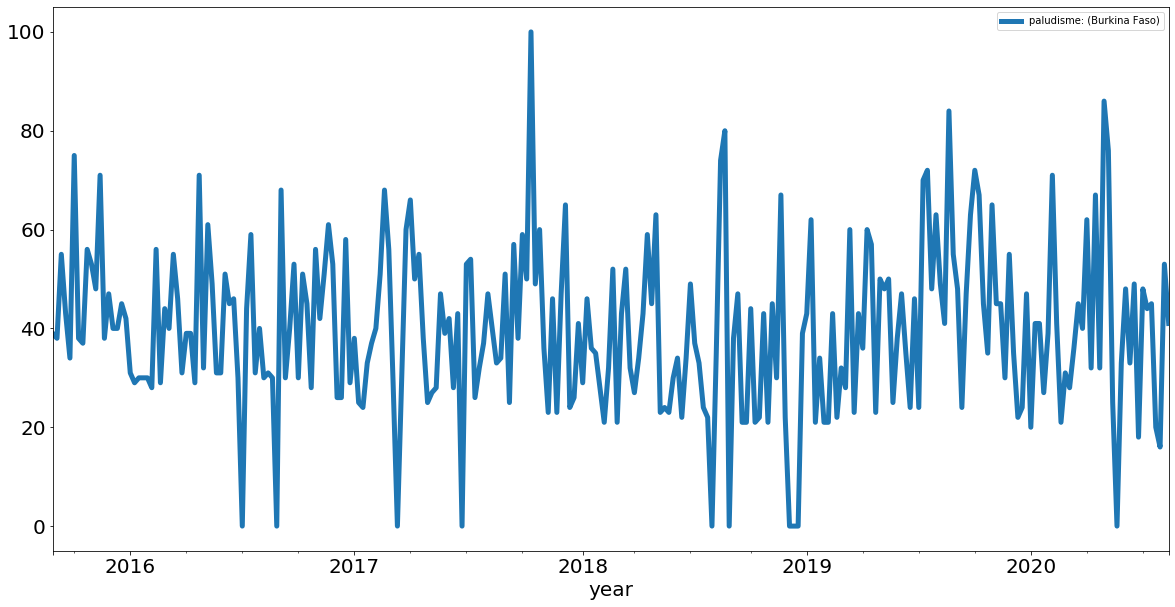

In [2]:
%matplotlib inline
dbf.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

La moyenne glissante. Cette méthode nous permettra de calculer la moyenne sur une fenêtre de temps donnée et observer les variations de la série.
Ici nous calculons la moyenne sur un intervalle de 100 jours
Ensuite nous construisons un graphe sur les résultats obtenus. Cela permet d'observer mieux la tendance.

Text(0.5, 0, 'year')

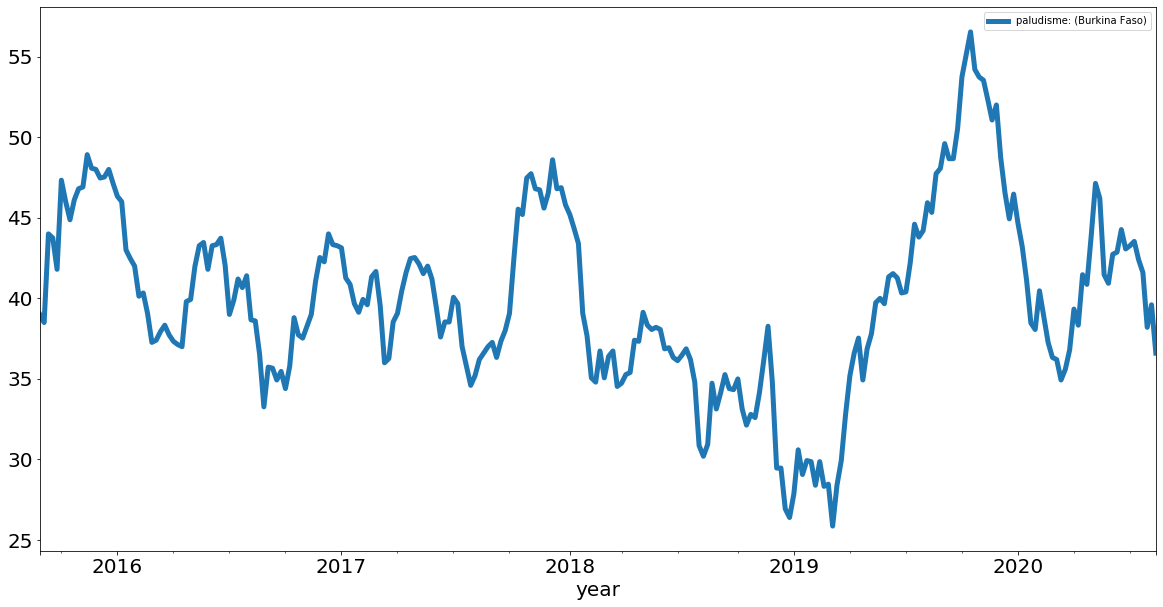

In [3]:
%matplotlib inline
dbf.rolling('100D').mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

Nous calculons toujours la moyenne mobile cette fois-ci sur une fenêtre de 364 jours

Text(0.5, 0, 'year')

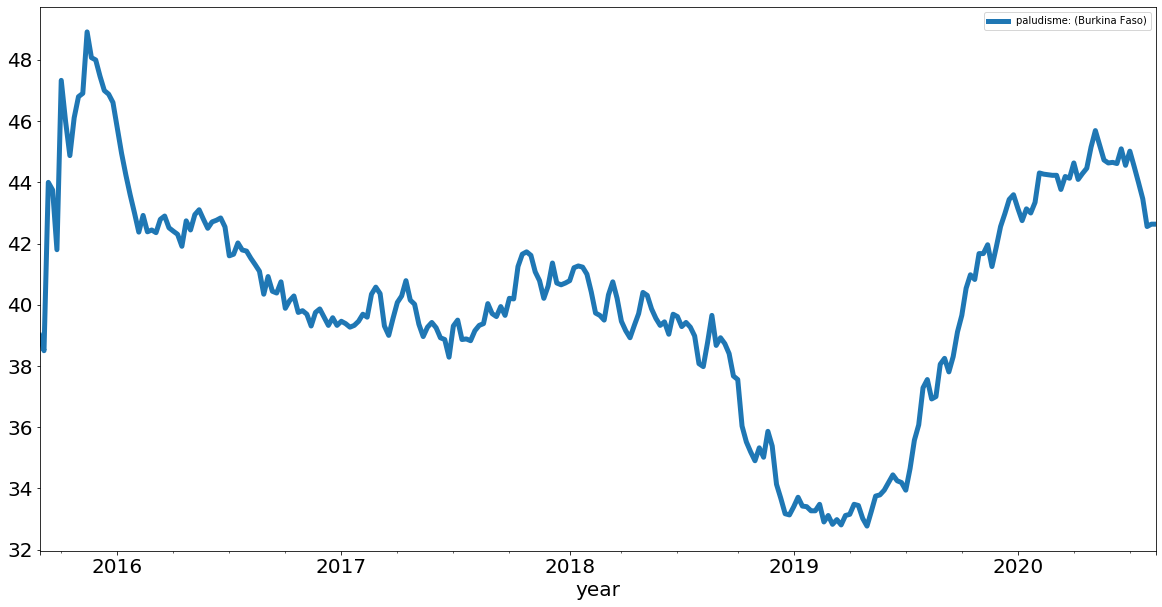

In [4]:
%matplotlib inline
dbf.rolling('364D').mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

Dans cette partie nous preparons les données pour la prediction
Nous utilisons 80% des donnees pour l'apprentissage et 20% pour le test

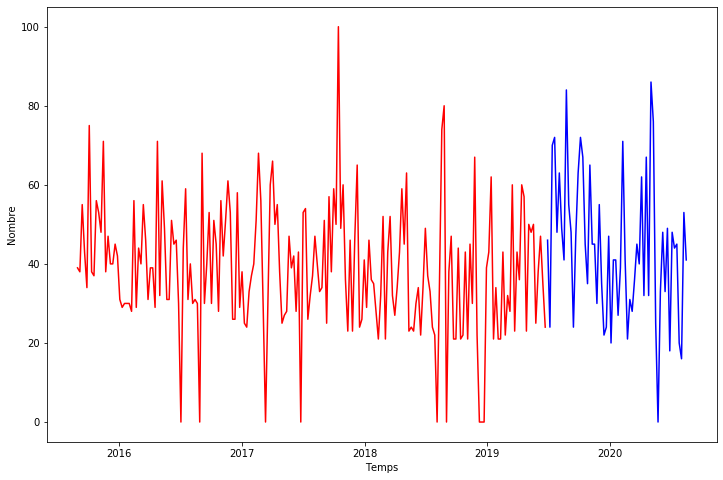

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #Sert au calcul d'erreur
from math import sqrt
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt
%matplotlib inline
#Affichage de plot
plt.figure(figsize=(12,8))
plt.plot(training,color='red')
plt.plot(test,color='blue')
plt.xlabel("Temps")
plt.ylabel("Nombre")
plt.show()

Lissage exponentielle simple.
A ce niveau nous faisons une prédiction avec la méthode exponentielle simple en faisant varier la valeur du paramètre alpha sans optimisation.
En calculant le taux d'erreur de prédiction avec les différentes valeurs de paramètres alpha il ressort qu’avec alpha égal à 0.2 on a le taux d'erreur minimale. Donc nous pouvons conclure en disant qu’avec alpha égal à 0.2 nous avons un bon modèle de prédiction.

En forçant l'optimisation avec un alpha estimé on obtient un taux d'erreur nettement mieux que les valeurs des alphas fixées.


C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


alpha 0.2: 19.218435266682633
alpha 0.4: 20.918836450592313
alpha 0.6: 22.842753329683163


C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


alpha 0.8: 24.85687259815915
Taux d'erreur avec alpha estimé: 18.674178273780882


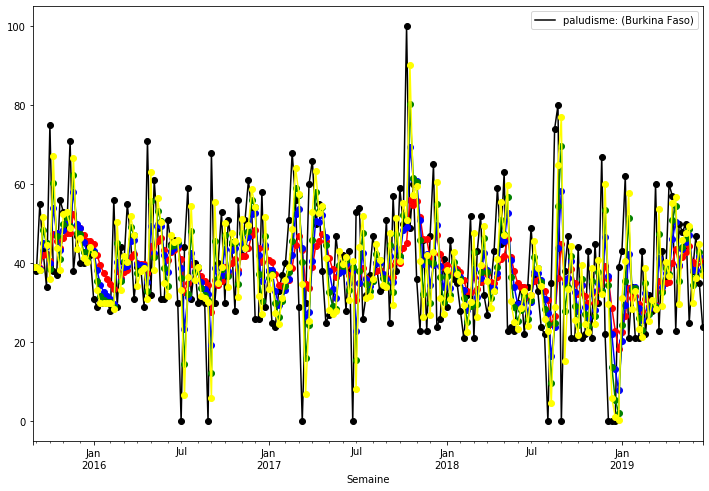

In [6]:
#lissage exponentiel simple
%matplotlib inline
alpha = [0.2,0.4,0.6,0.8]
color = ["red","blue","green","yellow"]
predict = []
result = []
erreur = []
ax = training.plot(marker='o', color='black', figsize=(12,8))
#plt.plot(training,color='red')
for i in range(4):
    # Apprendissage suivant le niveau de prediction alpha
    predict.append(SimpleExpSmoothing(training).fit(smoothing_level=alpha[i],optimized=False))
    # Prevision sur les donnees test
    result.append(predict[i].forecast(len(test)).rename(r'$\alpha=o.2$'))
    # Calcul du taux d'erreur entre les valeurs predites et les valeurs reelles
    erreur.append(np.sqrt(mean_squared_error(test,result[i])))
    print("alpha {}: {}".format(alpha[i],erreur[i]))
    predict[i].fittedvalues.plot(marker='o', ax=ax, color=color[i])

estimpredict = SimpleExpSmoothing(training).fit()
predict = estimpredict.forecast(len(test))
estim_err = np.sqrt(mean_squared_error(test,estimpredict.forecast(len(test))))
print("Taux d'erreur avec alpha estimé: {}".format(estim_err))

Contrairement à la méthode précédente, le lissage exponentielle double permet de prédire sur de série de données admettant une tendance.
Cette méthode utilise deux paramètres alpha et bêta. Nous allons varier ces deux valeurs afin de juger la performance des résultats obtenus pour choisir celles les mieux optimales.

Nous préparons un modèle de prédiction avec le paramètre alpha et bêta fixés sans optimisation (couleur rouge) ensuite un autre avec les deux paramètres optimisés (couleur verte) et la dernière est modèle avec prise en compte de la valeur de gamma.

C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\holtwinters.py:939: RuntimeWarning: invalid value encountered in double_scalars
  'initial_slope': b[0] / phi,


Erreur de la prediction avec parametre fixe: 111.97507114709165
Erreur de la prediction avec parametre optimisé: 20.850012997083397



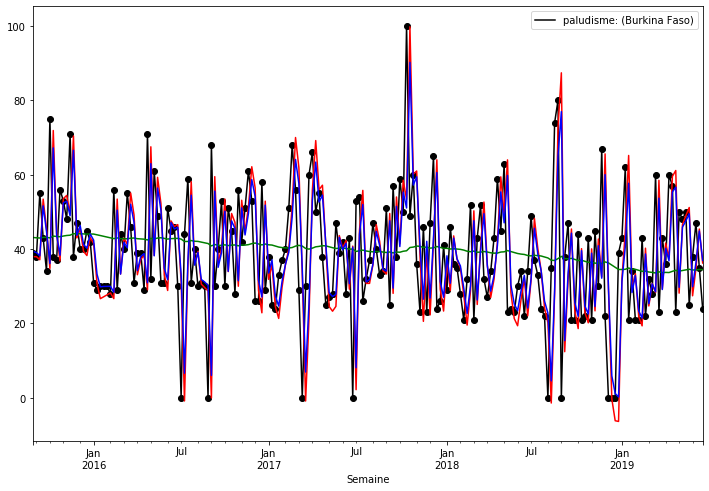

In [11]:
#Lissage exponentielle double
%matplotlib inline
predict_param_fix = Holt(training).fit(smoothing_level=0.8,smoothing_slope=0.2, optimized=False)
predict_param_optimize = Holt(training).fit()
predict_damped = Holt(training,damped=True).fit(smoothing_level=0.8,smoothing_slope=0.2)

ax = training.plot(marker='o', color='black', figsize=(12,8))
predict_param_fix.fittedvalues.plot(ax=ax, color='red')
predict_param_optimize.fittedvalues.plot(ax=ax, color='green')
predict_damped.fittedvalues.plot(ax=ax, color='blue')

#Prediction sur des donnees de test
predict_test_1 = predict_param_fix.forecast(len(test))
predict_test_2 = predict_param_optimize.forecast(len(test))
predict_test_3 = predict_damped.forecast(len(test))

# Calucl des erreur de predictions avec les valeurs reelles
erreur_1 = np.sqrt(mean_squared_error(test,predict_test_1))
erreur_2 = np.sqrt(mean_squared_error(test,predict_test_2))
#erreur_3 = np.sqrt(mean_squared_error(test,predict_test_3))
print("Erreur de la prediction avec parametre fixe: {}\nErreur de la prediction avec parametre optimisé: {}\n".format(erreur_1,erreur_2))

Tp méthode prédictive saisonnière additive et multiplicative.
Nous faisons varier la période de la saisonnalité additive afin de détecter la période optimale pour la prédiction.
Avec le calcul du taux d'erreur on conclut que la meilleure performance s'obtient avec la période 10 sans la valeur de gamma.

C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packa

Taux d'erreur
periode 4:20.93841496637306
periode 6:19.35543205056893
periode 8:19.35543205056893
periode 10:19.209269639745305

Le minimun est :  19.209269639745305


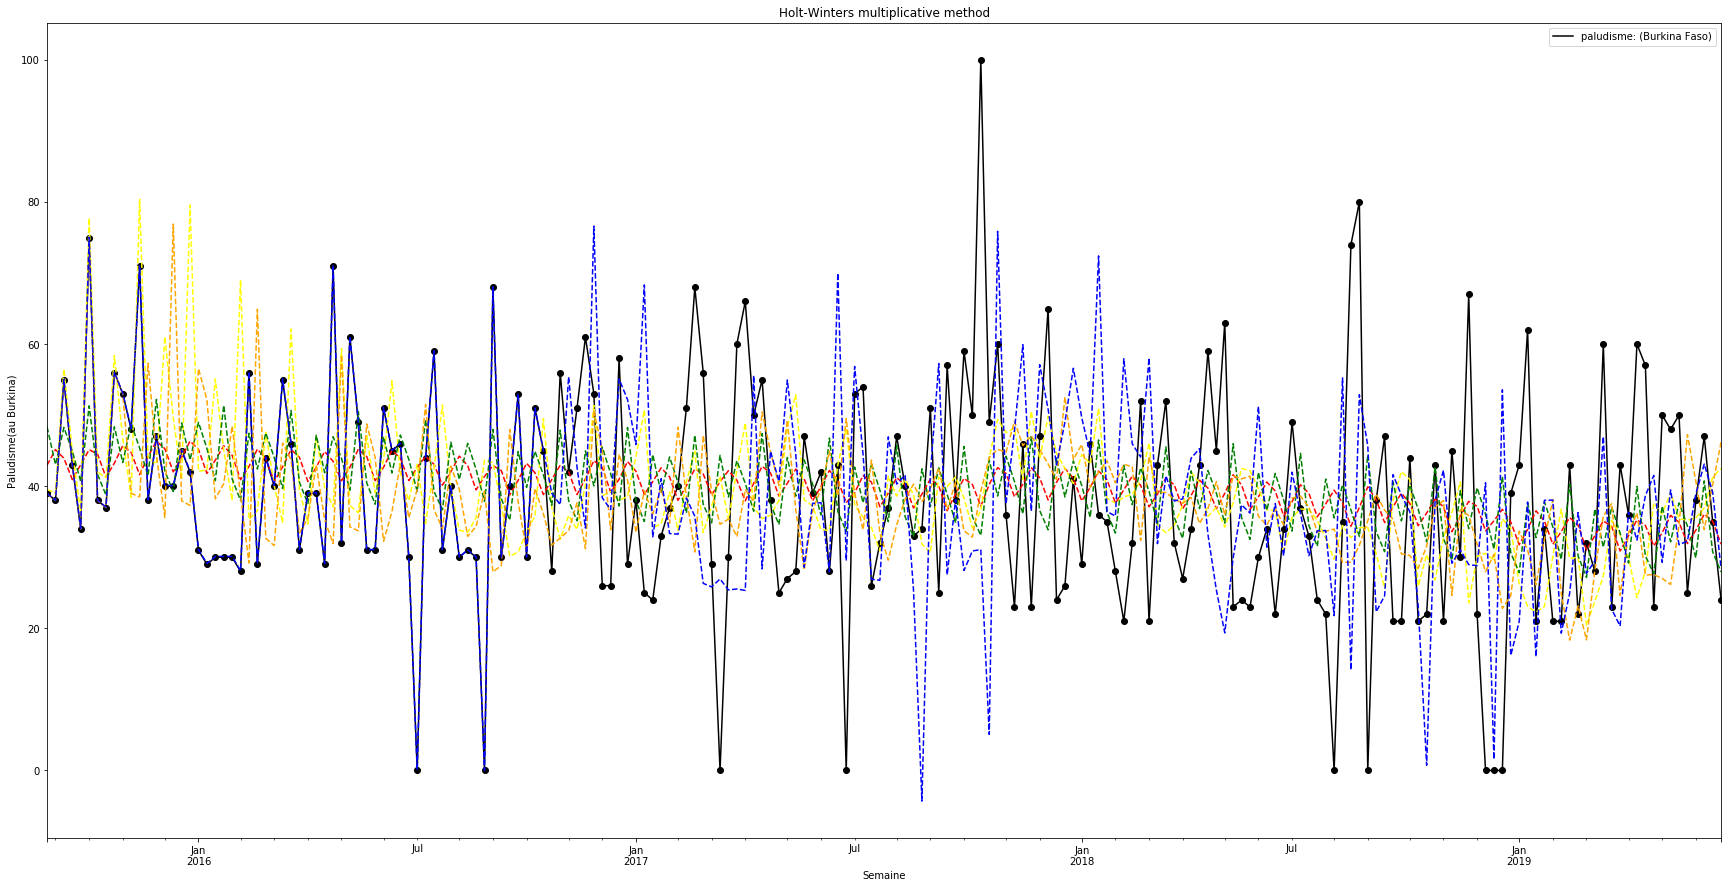

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
#Modèle de prédiction
sais_ad_4 = ExponentialSmoothing(training, seasonal_periods=4, trend='add',seasonal='add',damped=False).fit(use_boxcox=False)
sais_ad_60 = ExponentialSmoothing(training, seasonal_periods=60, trend='add',seasonal='add').fit(use_boxcox=False)
sais_ad_6 = ExponentialSmoothing(training, seasonal_periods=6, trend='add',seasonal='add').fit(use_boxcox=False)
sais_ad_8 = ExponentialSmoothing(training, seasonal_periods=8, trend='add',seasonal='add').fit(use_boxcox=False)
sais_ad_10 = ExponentialSmoothing(training, seasonal_periods=10, trend='add',seasonal='add').fit(use_boxcox=False)

#Plot des modèle de prédiction
ax = training.plot(figsize=(30,15), marker='o', color='black', title="Holt-Winters multiplicative method", legend=True )
ax.set_ylabel("Paludisme(au Burkina)")
ax.set_xlabel("Year")
sais_ad_4.fittedvalues.plot(ax=ax, style='--', color='red')
sais_ad_6.fittedvalues.plot(ax=ax, style='--', color='yellow')
sais_ad_8.fittedvalues.plot(ax=ax, style='--', color='green')
sais_ad_10.fittedvalues.plot(ax=ax, style='--', color='orange')
sais_ad_60.fittedvalues.plot(ax=ax, style='--', color='blue')
#sais_mu_4.fittedvalues.plot(ax=ax, style='--', color='green')

#Calcul du taux 'erreur
sais_ad_4_fcast = sais_ad_4.forecast(len(test)) #Prediction des données test à partir du modèle ave periode 4
err_sais_ad_4 = np.sqrt(mean_squared_error(test,sais_ad_4_fcast)) #Calcul de l'erreur avec saision 4
sais_ad_6_fcast = sais_ad_6.forecast(len(test))
err_sais_ad_6 = np.sqrt(mean_squared_error(test,sais_ad_6_fcast))
sais_ad_8_fcast = sais_ad_6.forecast(len(test))
err_sais_ad_8 = np.sqrt(mean_squared_error(test,sais_ad_8_fcast))
sais_ad_10_fcast = sais_ad_10.forecast(len(test))
err_sais_ad_10 = np.sqrt(mean_squared_error(test,sais_ad_10_fcast))
sais_ad_60_fcast = sais_ad_60.forecast(len(test))
err_sais_ad_60 = np.sqrt(mean_squared_error(test,sais_ad_60_fcast))

#Affichage des erreurs de prediction
print("Taux d'erreur")
print("periode 4:{}\nperiode 6:{}\nperiode 8:{}\nperiode 10:{}\n".format(err_sais_ad_4, err_sais_ad_6, err_sais_ad_8, err_sais_ad_10))
print("Le minimun est : ",min(err_sais_ad_4, err_sais_ad_6, err_sais_ad_8, err_sais_ad_10, err_sais_ad_60))

C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


L'erreur de prediction est avec une saisonalité de 2 est de :19.34039166229418


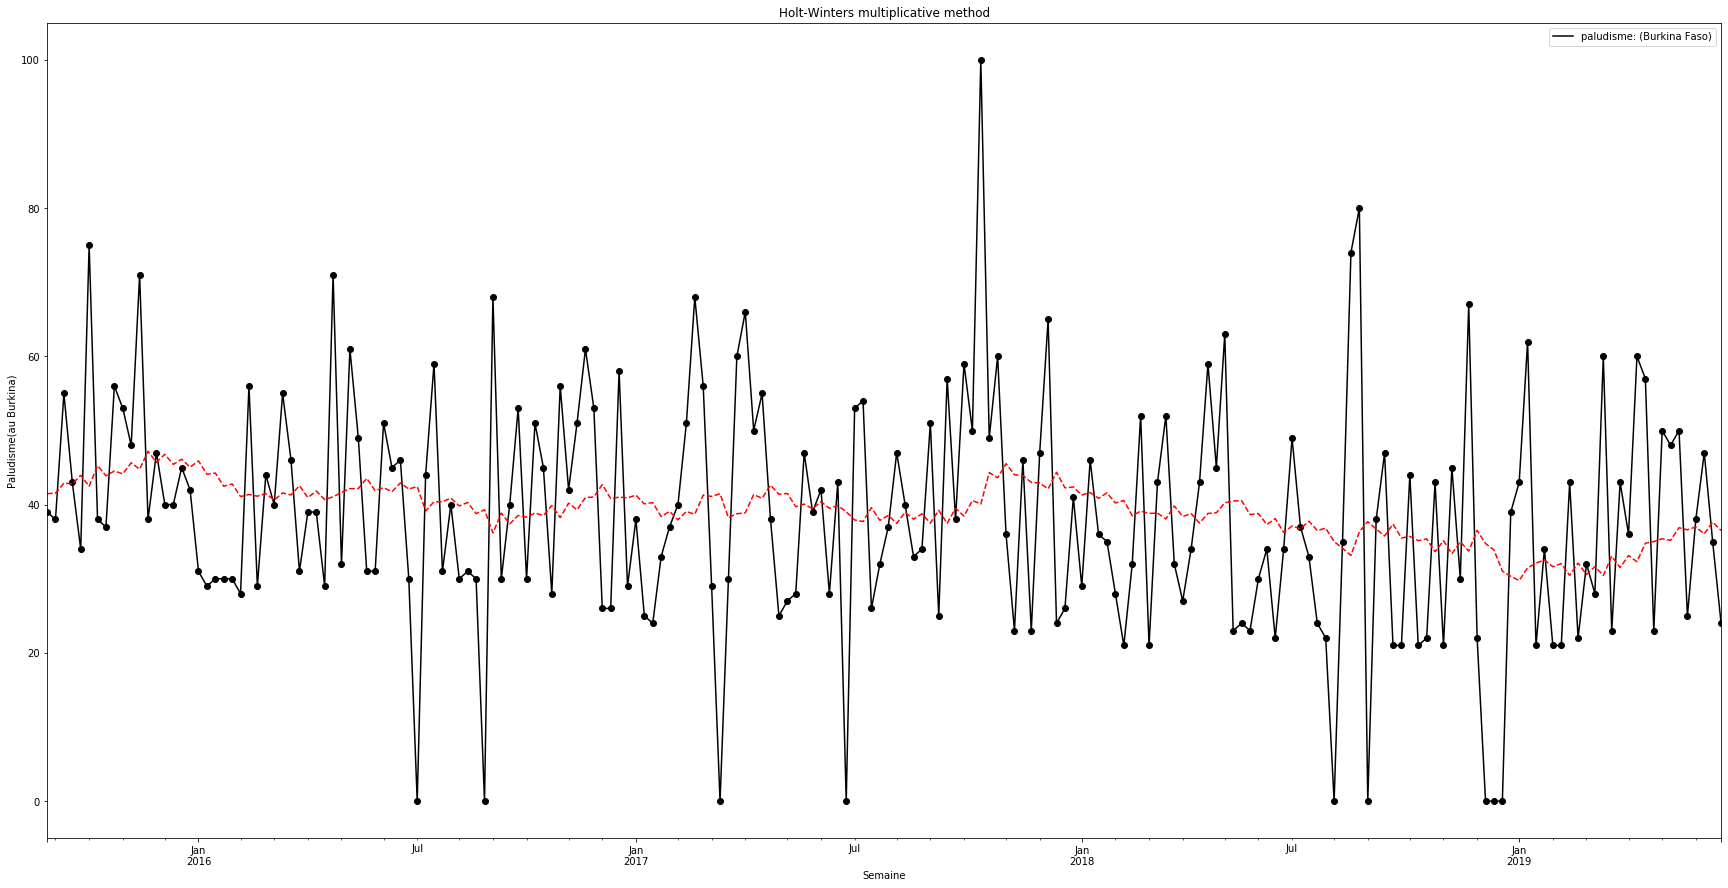

In [9]:
#Nous reprenons avec une periode de 2 en prenant en compte la valeur de gamma
%matplotlib inline
sais_ad_d_4 = ExponentialSmoothing(training, seasonal_periods=2, trend='add',seasonal='add',damped=True).fit(use_boxcox=False)
ax = training.plot(figsize=(30,15), marker='o', color='black', title="Holt-Winters multiplicative method", legend=True )
ax.set_ylabel("Paludisme(au Burkina)")
ax.set_xlabel("Year")
sais_ad_d_4.fittedvalues.plot(ax=ax, style='--', color='red')
# Prediction sur les donnee test
sais_ad_d_4_fcast = sais_ad_d_4.forecast(len(test)) 
#Calcul du taux d'erreur de prediction
err_sais_ad_d_4 = np.sqrt(mean_squared_error(test,sais_ad_d_4_fcast))
print("L'erreur de prediction est avec une saisonalité de 2 est de :{}".format(err_sais_ad_d_4))

La parcelle de acf et pacf facilite le choix de l'ordre de différenciation pour la méthode ARIMA.
Avec les deux figures ci-dessous on observe deux pics en dehors de la zone blue. Cela signifie qu'il y'a une autocorrelation des decallages de la série.

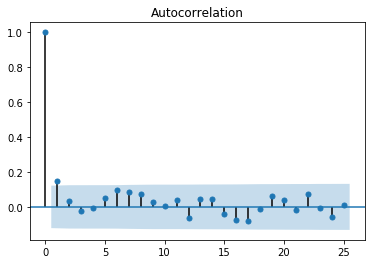

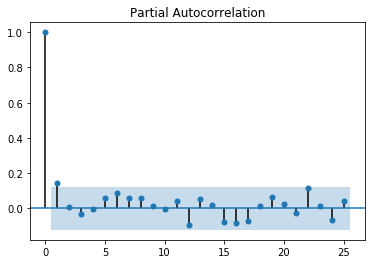

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Auto correlation
%matplotlib inline
plot_acf(dbf)

#La correlation de la difference
plot_pacf(dbf)
plt.show()

Le modèle ARIMA est un des modèles statistiques permettant d'analyser et de prédire sur des données de séries chronologique.
Il utilise les paramètres p: ordre de retard, d: degré de différenciation, p: ordre de moyenne mobile. En fonction des valeurs de ces paramètres le modèle ARIMA peut être configurer pour exécuter les modèles AR, I, MA OU ARMA.
Pour appliquer le modèle ARIMA il faut au préalable vérifier que les données n'admettent pas de tendance et de saisonnalité, donc il faut que la série soit stationnaire.

C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                                  ARMA Model Results                                 
Dep. Variable:     paludisme: (Burkina Faso)   No. Observations:                  260
Model:                            ARMA(1, 0)   Log Likelihood               -1097.176
Method:                              css-mle   S.D. of innovations             16.460
Date:                       Thu, 10 Sep 2020   AIC                           2200.351
Time:                               23:21:34   BIC                           2211.033
Sample:                           08-30-2015   HQIC                          2204.646
                                - 08-16-2020                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              39.7619      1.194     33.298      0.000      37.421      42.102
ar.L1.paludi

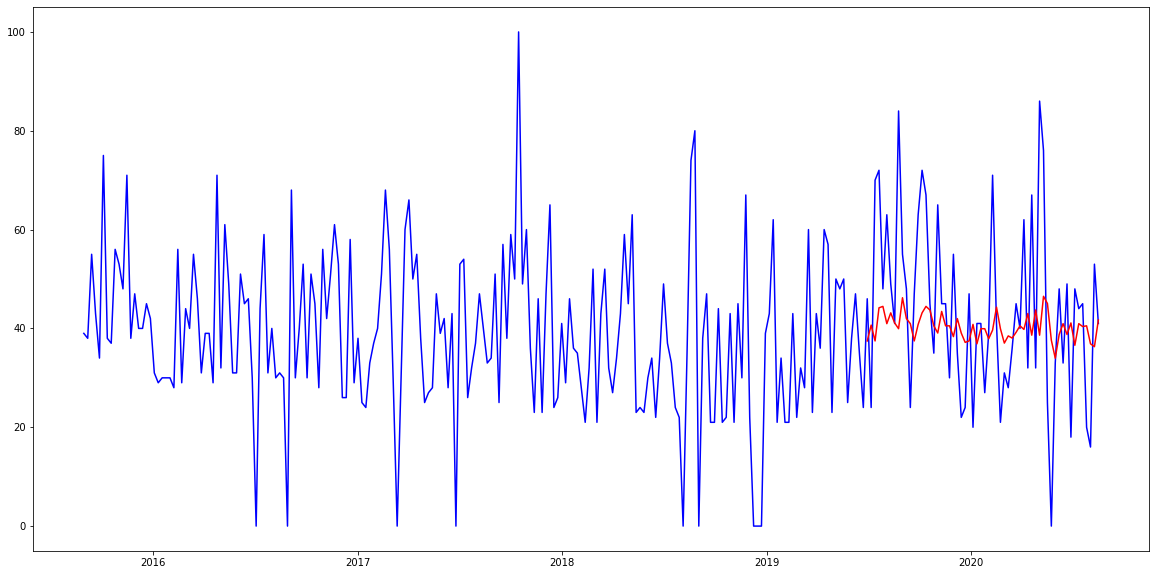

In [12]:
from statsmodels.tsa.arima_model import ARIMA #AutoReg,ar_select_order

#Division des données
train=dbf[0:200]
test=dbf[200:]
#Declaration du modele avec les parametres p=1, d=0 et p=0
modele_ARIMA = ARIMA(dbf,order=(1,0,0))
#AR(train, lags=10, trend="c")

#Prediction
predict_model_ARIMA = modele_ARIMA.fit()
#Resume de de la prediction
print(predict_model_ARIMA.summary())
print(predict_model_ARIMA.params)
#Verification de la prediction
#On predit les donnees reservées pour le tess
prediction = predict_model_ARIMA.predict(start=len(train), end=len(train)+len(test)-1)

%matplotlib inline
plt.subplots(figsize=(20,10))
plt.plot(dbf, color="blue")
plt.plot(prediction, color='red')

En bleu les données test réelles et en rouge les valeurs predites

Le modèle AR s'obtient en fixant l'ordre p du modèle ARIMA
Dans notre cas on n'a pas d'autocorrelation négative donc e choix de cette methode n'est pas approprié

Parametre de prediction
Coef: const                            32.748983
L1.paludisme: (Burkina Faso)      0.108195
L2.paludisme: (Burkina Faso)      0.003348
L3.paludisme: (Burkina Faso)     -0.062444
L4.paludisme: (Burkina Faso)     -0.042137
L5.paludisme: (Burkina Faso)      0.009593
L6.paludisme: (Burkina Faso)      0.018566
L7.paludisme: (Burkina Faso)      0.109364
L8.paludisme: (Burkina Faso)      0.092622
L9.paludisme: (Burkina Faso)     -0.019214
L10.paludisme: (Burkina Faso)    -0.078317
L11.paludisme: (Burkina Faso)     0.095097
L12.paludisme: (Burkina Faso)    -0.114121
L13.paludisme: (Burkina Faso)    -0.009881
L14.paludisme: (Burkina Faso)     0.023184
dtype: float64


C:\ProgramData\Anaconda3.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


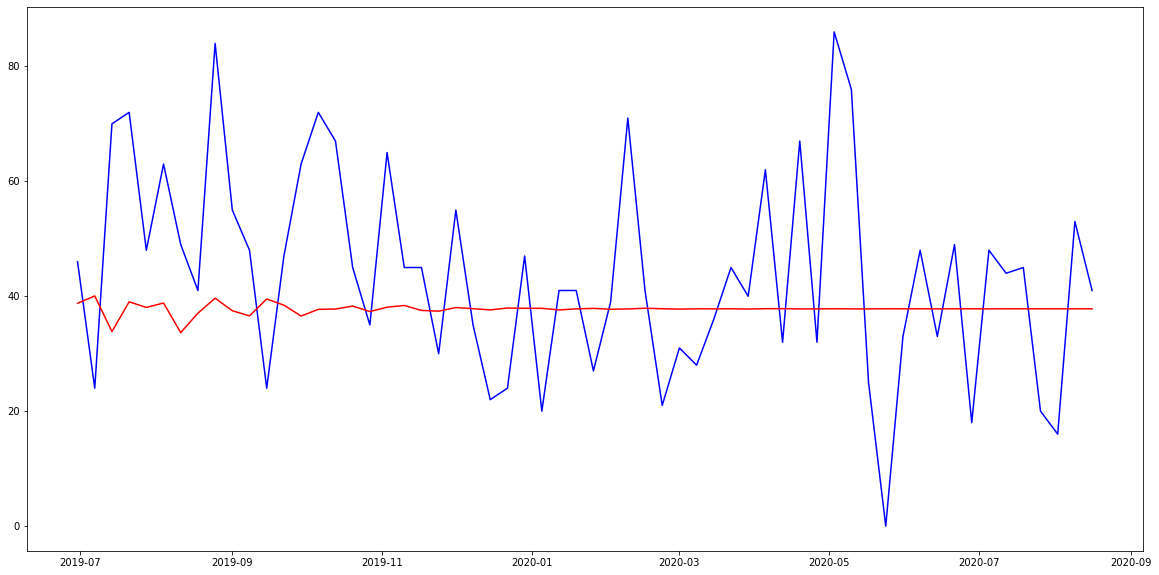

In [15]:
#--- Methode AR Auto Regression ----dependant de P
%matplotlib inline
from pandas.plotting import lag_plot
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR #AutoReg,ar_select_order

modele = AR(training) #AR(train, lags=10, trend="c")
modele_predict = modele.fit()
prediction = modele_predict.predict(start=len(train), end=len(train)+len(test)-1)
print("Parametre de prediction\n================================")
print('Coef: %s' % modele_predict.params)

plt.subplots(figsize=(20,10))
plt.plot(test, color="blue")
plt.plot(prediction, color='red')

En bleu les données test réelles et en rouge les valeurs predites